In [1]:
#Import module
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats
import scipy.optimize as optimization  
import pandas as pd
#Latex font
import matplotlib as mpl
from matplotlib import rc
plt.rc('text', usetex=True)
plt.rc('font', family='serif',size=16)

In [2]:
ls

2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out
2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev1.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_P_rev.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c.ipynb
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c1.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_c2.pdf
DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_dP_r

In [3]:
#Read data ---#1
#Input = "2022_Mar_week2_Weighted_mean_calculation_Beuermann_2011_combined.txt"
Input = "2022_Feb_week4_Weighted_mean_calculation_Beuermann_2011_combined.out"
Data   = np.genfromtxt(Input)

BJD_time = Data[:,0]
OC = Data[:,1]
OC_err = Data[:,2]

In [4]:
#Linear phemeris equation(From equation 1) convert from TT to TDB
#New ephemeris
#BJD0 = 2448773.21461 - 2400000
#P0 = 0.0623628426

#Schwope_2002
BJD0 = 2448773.215071 - 2400000
dBJD0 = 0.000018
P0 = 0.06236283691
dP0 = 0.00000000070

In [5]:
#t = T0_bjd + P0_day*Epoch
x = BJD_time
y = OC
dy = OC_err

#len_x = len(x)
#print(len_x)
#print(x)

t = BJD_time
len_x = len(t)

In [6]:
def TAno(P,tau,e,t):
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    return f

In [7]:
from scipy.optimize import fsolve
from scipy.optimize import curve_fit

In [18]:
#Parameters
m = 0
c = 0
K = 10       
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("K_output_a.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

44214.61562 0.8666219327157362 1.23481609040668 2.4086778532605493
44993.45298 1.3454457543433849 1.7304837947369647 7.2707584762975035
45851.40631 1.8729095270735001 2.1904097107400955 11.060864655097758
46086.96681 2.017730493076619 2.3067856169900147 11.806286538130728
48560.5578 3.5384771236382466 3.4282176707010223 12.648673269351885
48773.71401 3.6695240871222086 3.52399532486365 12.167064094094043
49143.77505 3.8970350547628696 3.6927893114212127 11.135058463466233
51870.83925 5.573615261531505 5.235835707425898 -2.7430816011944215
52284.71018 5.828060246506533 5.574122319177708 -4.862568643992125
54919.76589 1.164888962876034 1.5548393120535615 5.5840960045237065
54941.30349 1.1781301303781755 1.5681287429328055 5.714280488032806
54970.67822 1.1961895111940648 1.5861435821963046 5.8902152558909115
54999.31317 1.2137940803830882 1.603584462058827 6.059903225490954
55135.97098 1.2978103566945678 1.6852583416525755 6.844606127293552
55159.94602 1.3125500454486845 1.699332763313223

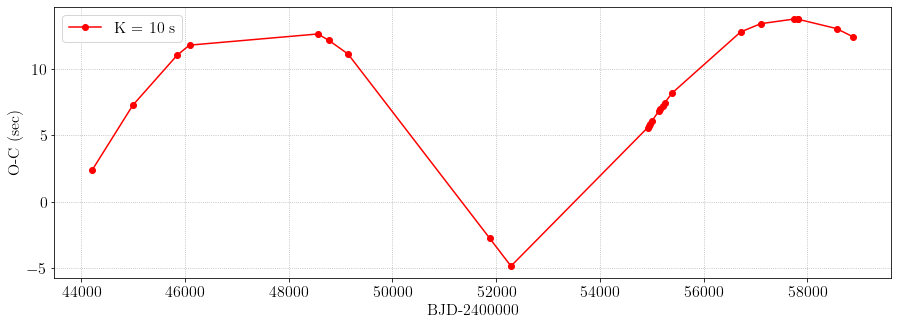

In [19]:
InputFile_out = "K_output_a.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_a = Data_out[:,0]
y_a = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [10]:
#Parameters
m = 0
c = 0
K = 20       
P = 10220       
e = 0.39              
w = -1.36          
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("K_output_b.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

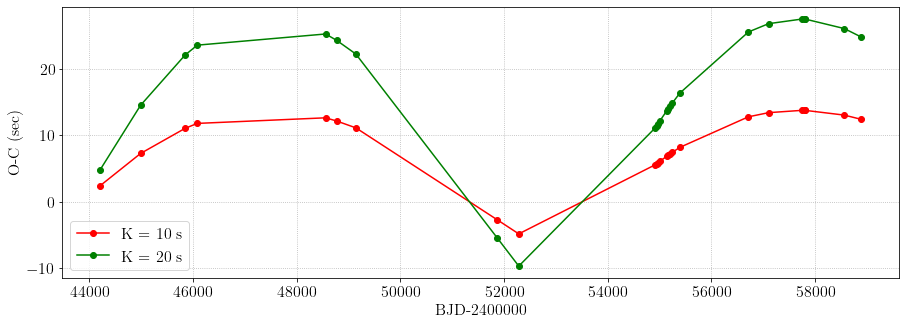

In [11]:
InputFile_out = "K_output_b.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_b = Data_out[:,0]
y_b = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [12]:
#Parameters
m = 0
c = 0
K = 30       
P = 10220       
e = 0.39               
w = -1.36          
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("K_output_c.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

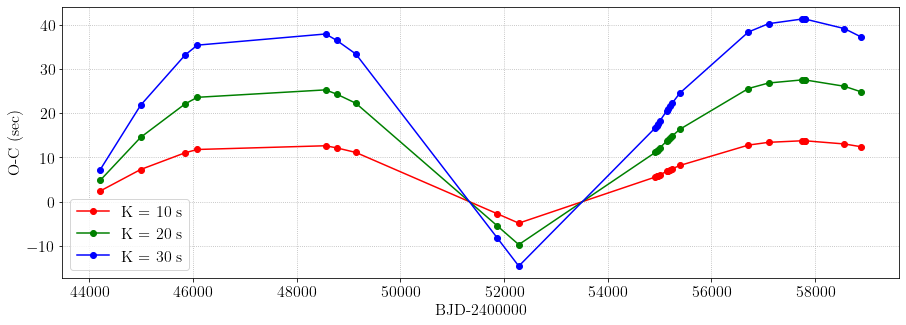

In [13]:
InputFile_out = "K_output_c.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_c = Data_out[:,0]
y_c = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [14]:
#Parameters
m = 0
c = 0
K = 40       
P = 10220       
e = 0.39             
w = -1.36          
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("K_output_d.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

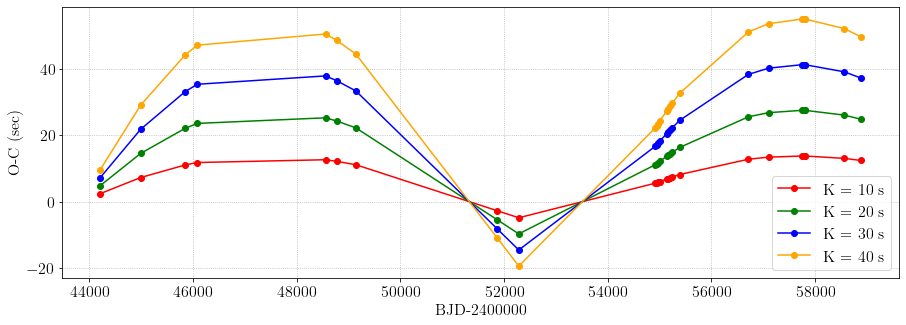

In [15]:
InputFile_out = "K_output_d.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_d = Data_out[:,0]
y_d = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
plt.plot(x_d, y_d, '-o', color='orange',label='K = 40 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(-6000,6000)
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
#plt.savefig("2022_Feb_week4_new_ephemeris_LTT_fit.jpg", dpi=1000)
plt.show()

In [16]:
#Parameters
m = 0
c = 0
K = 50      
P = 10220       
e = 0.39              
w = -1.36           
tau = 53025   

output = []
for i in range(len_x):
 #   print(i, x[i])
    MAno = 2*np.pi/P*((t-tau)%P)
    EFunc = lambda x: x-e*np.sin(x)-MAno
    EAno = fsolve(EFunc, MAno)
    f = np.arccos((np.cos(EAno)-e)/(1-e*np.cos(EAno)))
    f = np.where(EAno>np.pi,-f,f)
    f = TAno(P,tau,e,t)
    Epoch = (t-BJD0)/P0
    f = m*Epoch + c + K*((1-e*e)/(1+e*np.cos(f))*np.sin(f+w))
#    print(x[i], MAno[i], EAno[i], f[i])
    output.append('%0.5f %0.5f %0.5f %0.5f' %(x[i], MAno[i], EAno[i], f[i]))
    
data_out = output
f = open("K_output_e.out", 'w')
for i in range(len(data_out)):
    f.write(str(data_out[i])+ '\n')
f.close()

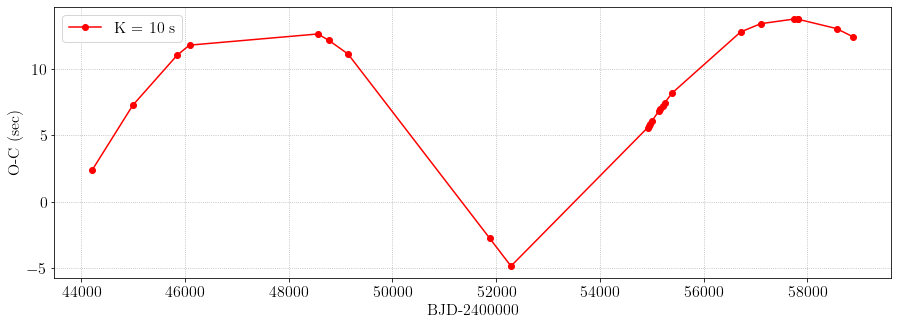

In [17]:
InputFile_out = "K_output_e.out"
Data_out   = np.genfromtxt(InputFile_out)

#Read the wd data: BJD vs. Relative flux
x_e = Data_out[:,0]
y_e = Data_out[:,3]

#print(y_range)

N_BMJD = 2400000
#Plotgraph
fig=plt.figure(figsize=(15, 5))
#plt.errorbar(x, y, yerr= dy, fmt='o', markersize=8, color='blue', ecolor='lightgray',label='Data')
# create a line plot for the mapping function
plt.plot(x_a, y_a, '-o', color='red',label='K = 10 s')
#plt.plot(x_b, y_b, '-o', color='green',label='K = 20 s')
#plt.plot(x_c, y_c, '-o', color='blue',label='K = 30 s')
#plt.plot(x_d, y_d, '-o', color='orange',label='K = 40 s')
#plt.plot(x_e, y_e, '-o', color='magenta',label='K = 50 s')
#plt.plot(BJD_time, OC_s_ecc, lw=2, color='black')
#plt.xlim(x_a[0],x_a[-1])
#plt.ylim(-200,200)
#plt.ylim(-40,60)
plt.xlabel('BJD-'+str(N_BMJD))
plt.ylabel('O-C (sec)')
plt.grid(linestyle='dotted')
plt.legend(loc="best")
#####plt.title('O-C diagram: DP Leo')
#output_filename = os.path.splitext(__file__)[0] + '.png'
plt.savefig("DP_Leo_LTT_fit_Indirect_Linear_parameter_changes_K_rev.pdf", format='pdf', dpi=1200)
plt.show()